In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm
from scipy.optimize import root_scalar


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Users/andrewspears/.pyenv/versions/3.11.3/lib/python3.11/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/Users/andrewspears/.pyenv/versions/3.11.3/lib/python3.11/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/Users/andrewspears/.pyenv/versions/3.11.3/lib/python3.11/site-packages/ipykernel/kernelapp.py", lin

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Users/andrewspears/.pyenv/versions/3.11.3/lib/python3.11/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/Users/andrewspears/.pyenv/versions/3.11.3/lib/python3.11/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/Users/andrewspears/.pyenv/versions/3.11.3/lib/python3.11/site-packages/ipykernel/kernelapp.py", lin

AttributeError: _ARRAY_API not found

In [ ]:
# TEMPLATE CLASS
class ContinuousPokerTemplate:
    @staticmethod
    def value_size(game_params, x):
        raise NotImplementedError("value_size method must be implemented in subclasses")
    
    @staticmethod
    def bluff_size(game_params, x):
        raise NotImplementedError("bluff_size method must be implemented in subclasses")

    @staticmethod
    def call_threshold(game_params, s):
        raise NotImplementedError("call_threshold method must be implemented in subclasses")
    
    @staticmethod
    def bluff_threshold(game_params):
        raise NotImplementedError("bluff_threshold method must be implemented in subclasses")
    
    @staticmethod
    def value_threshold(game_params):
        raise NotImplementedError("value_threshold method must be implemented in subclasses")

    @classmethod
    def bluff_call(cls, game_params, x, y):
        s = cls.bluff_size(game_params, x)
        return y > cls.call_threshold(game_params, s)
    
    @classmethod


    @classmethod
    def payoff_outcome(cls, game_params, x, y):
        if x < cls.bluff_threshold(game_params): # bluff
            if cls.bluff_call(game_params, x, y):
                return -s - 0.5, "Bluff_Called"
            else:
                return 0.5, "Bluff_Fold"
        elif x > cls.value_threshold(game_params): # value bet
            s = cls.value_size(game_params, x)
            if y < cls.call_threshold(game_params, s):
                return 0.5, "Value_Fold"
            elif y > x:
                return -s - 0.5, "Value_Loses"
            else:
                return s + 0.5, "Value_Wins"
        else: 
            if x > y:
                return 0.5, "Check_Wins" 
            else:
                return -0.5, "Check_Loses"
            
    @classmethod
    def expected_payoff(cls, game_params, grid_size=1001):
        # numerically integrate the payoff(x, y) function over the grid [0,1] x [0,1]
        xs = np.linspace(0, 1, grid_size)
        ys = np.linspace(0, 1, grid_size)
        payoff_data = np.empty((grid_size, grid_size))
        for i in range(grid_size):
            for j in range(grid_size):
                try:
                    val, _ = cls.payoff_outcome(game_params, xs[i], ys[j])
                    payoff_data[i, j] = val if np.isfinite(val) else np.nan
                except:
                    payoff_data[i, j] = np.nan
        average_payoff = np.nanmean(payoff_data)
        return average_payoff
    
    @classmethod
    def expected_payoff_by_region(cls, game_params, grid_size=1001):
        '''
        Compute the integral over the square by regions to avoid ever solving for v_inv and b_inv
        '''
        bth = cls.bluff_threshold(game_params)
        vth = cls.value_threshold(game_params)

        # Bluff Called
        # r1: x < b(U), y > c(U), s = U
        # r2: b(U) < x < b(L), y > c(U), b(s) = x
        # r3: b(c_inv(y)) < x < b(L), c(L) < y < c(U), b(s) = x
        # r4    : b(L) < x < bth, y > c(L), s = L
        # r5: x < b(c_inv(y)), c(L) < y < c(U), bet is 
                
    @classmethod
    def generate_strategy_plot(cls, game_params, s_lim=None, grid_size=1001, save_path=None, title="Strategy Profile"):
        # find bluff and value sizes for each x
        X = np.linspace(0, 1, grid_size)
        bet_sizes = np.empty(grid_size)
        call_thresholds = np.empty(grid_size)
        for i, x in enumerate(X):
            if x < cls.bluff_threshold(game_params):
                s = cls.bluff_size(game_params, x)
            elif x > cls.value_threshold(game_params):
                s = cls.value_size(game_params, x)
            else:
                s = 0
            bet_sizes[i] = s

        # Add artificial points for perfect vertical lines
        adjusted_X = []
        adjusted_bet_sizes = []
        for i in range(len(bet_sizes) - 1):
            adjusted_X.append(X[i])
            adjusted_bet_sizes.append(bet_sizes[i])
            if bet_sizes[i] != 0 and bet_sizes[i + 1] == 0:
                adjusted_X.append(X[i])
                adjusted_bet_sizes.append(0)
            elif bet_sizes[i] == 0 and bet_sizes[i + 1] != 0:
                adjusted_X.append(X[i + 1])
                adjusted_bet_sizes.append(0)
        adjusted_X.append(X[-1])
        adjusted_bet_sizes.append(bet_sizes[-1])

        adjusted_X = np.array(adjusted_X)
        adjusted_bet_sizes = np.array(adjusted_bet_sizes)

        if s_lim is None:
            s_lim = np.max(adjusted_bet_sizes) * 1.1

        # find call thresholds for each s
        s_min = np.min(adjusted_bet_sizes[adjusted_bet_sizes > 0])
        s_max = np.max(adjusted_bet_sizes[adjusted_bet_sizes != np.inf])
        S = np.linspace(s_min, s_max, grid_size)
        for i, s in enumerate(S):
            call_thresholds[i] = cls.call_threshold(game_params, s)

        # plot
        fig, ax = plt.subplots(figsize=(8, 6))

        # Plot bet sizes as a function of x
        ax.plot(adjusted_X, adjusted_bet_sizes, label="Bet Function", color="red", linewidth=2)

        # Plot call thresholds as a function of s
        if s_min == s_max:
            # point instead of line
            ax.plot(call_thresholds, S, label="Call Threshold", color="blue", marker="o", markersize=5)
            ax.plot([call_thresholds[0], 1], [S[0], S[0]], color="blue", linestyle="--", alpha=0.3, linewidth=2, label="Call Region") 
        else:
            ax.plot(call_thresholds, S, label="Call Threshold", color="darkblue", linestyle="--", linewidth=2)
            ax.fill_betweenx(S, call_thresholds, np.ones_like(S), color="blue", alpha=0.3, label="Call Region")

        # ---- Labels, Legend, and Title ----
        ax.set_xlabel("Hand Strength", fontsize=12)
        ax.set_ylabel("Bet Size", fontsize=12)
        ax.set_title(title, fontsize=14)
        ax.legend(fontsize=10)
        ax.grid(True)

        # ---- Save or Show ----
        plt.tight_layout()
        if save_path:
            plt.savefig(save_path, dpi=300)
        plt.show()


    @classmethod
    def generate_payoff_plot(cls, game_params, grid_size=1001, save_path=None, title="Payoffs by Hand Strength"):
        # ---- Parameters ----
        xs = np.linspace(0, 1, grid_size)
        ys = np.linspace(0, 1, grid_size)
        X, Y = np.meshgrid(xs, ys, indexing='ij')
        color_cap = 2

        # ---- Compute payoff grid ----
        payoff_data = np.empty((grid_size, grid_size))
        outcome_type = np.empty((grid_size, grid_size), dtype=object)
        for i in range(grid_size):
            for j in range(grid_size):
                try:
                    val, outcome = cls.payoff_outcome(game_params, xs[i], ys[j])
                    payoff_data[i, j] = val if np.isfinite(val) else np.nan
                    outcome_type[i, j] = outcome
                except:
                    payoff_data[i, j] = np.nan
        payoff_clipped = np.clip(payoff_data, -color_cap, color_cap)

        region_labels = [
            "Bluff_Called", "Bluff_Fold",
            "Value_Wins", "Value_Loses", "Value_Fold",
            "Check_Wins", "Check_Loses"
        ]

        # ---- Plot heatmap with region contours and labels ----
        fig, ax = plt.subplots(figsize=(7, 7))
        c = ax.imshow(
            payoff_clipped.T,
            extent=[0, 1, 0, 1],
            origin='lower',
            cmap='coolwarm',
            norm=TwoSlopeNorm(vmin=-color_cap, vcenter=0, vmax=color_cap)
        )
        cbar = fig.colorbar(c, ax=ax, shrink=0.9)
        cbar.set_label("Bettor Payoff", fontsize=12)
        cbar.set_ticks([-color_cap, 0, color_cap])
        cbar.set_ticklabels([f"<-{color_cap}", "0", f">{color_cap}"])

        for label in region_labels:
            mask = outcome_type == label
            if np.any(mask):
                ax.contour(
                    X, Y, mask.astype(float),
                    levels=[0.5],
                    colors='white',
                    linewidths=1.5
                )
                region_center = np.argwhere(mask)
                if len(region_center) > 0:
                    center_x, center_y = region_center.mean(axis=0)
                    ax.text(
                        xs[int(center_x)], ys[int(center_y)],
                        label.replace("_", " "),
                        color="white",
                        fontsize=10,
                        ha="center",
                        va="center",
                        bbox=dict(facecolor="black", alpha=0.5, edgecolor="none")
                    )

        ax.set_xlabel("x (bettor hand strength)")
        ax.set_ylabel("y (caller hand strength)")
        ax.set_title(title)
        plt.tight_layout()
        if save_path is not None:
            plt.savefig(save_path, dpi=300)
        plt.show()

In [3]:
# FIXED BET CONTINUOUS POKER 

class CP(ContinuousPokerTemplate):
    # ---- Threshold functions ----
       
    def bluff_threshold(game_params):
        B = game_params['B']
        return 2 * B / ((1 + 2 * B) * (4 + 2 * B))

    def value_threshold(game_params):
        B = game_params['B']
        return (2 + 8 * B + 4 * B**2) / ((1 + 2 * B) * (4 + 2 * B))

    def call_threshold(game_params, s):
        return (2 * s * (3 + 2 * s)) / ((1 + 2 * s) * (4 + 2 * s))

    def bluff_size(game_params, x):
        return game_params['B']

    def value_size(game_params, x):
        return game_params['B']

In [4]:
# NO LIMIT CONTINUOUS POKER
class NLCP(ContinuousPokerTemplate):
    def bluff_threshold(game_params):
        return 1 / 7

    def value_threshold(game_params):
        return 4 / 7

    def call_threshold(game_params, s):
        return 1 - 6 / (7 * (1 + s))

    def bluff_size(game_params, x):
        return (1 / (7 * x)**(1/3)) - 1

    def value_size(game_params, x):
        return np.sqrt(3 / (7 * (1 - x))) - 1

In [ ]:
# L, U LIMIT CONTINUOUS POKER

class LCP_utils:
    _cache = {}
    _last_game_params = None

    @staticmethod
    def clear_cache():
        LCP_utils._cache.clear()
        LCP_utils._last_game_params = None

    @staticmethod
    def check_and_clear_cache(game_params):
        if LCP_utils._last_game_params != game_params:
            LCP_utils.clear_cache()
            LCP_utils._last_game_params = game_params

    @staticmethod
    def compute_A0(game_params):
        L, U = game_params['L'], game_params['U']
        LCP_utils.check_and_clear_cache(game_params)
        if 'A0' not in LCP_utils._cache:
            LCP_utils._cache['A0'] = U**2 + 3 * U + 3
        return LCP_utils._cache['A0']

    @staticmethod
    def compute_A1(game_params):
        L, U = game_params['L'], game_params['U']
        LCP_utils.check_and_clear_cache(game_params)
        if 'A1' not in LCP_utils._cache:
            LCP_utils._cache['A1'] = 7 * U**3 + 21 * U**2 + 21 * U + 6
        return LCP_utils._cache['A1']

    @staticmethod
    def compute_A2(game_params):
        L, U = game_params['L'], game_params['U']
        LCP_utils.check_and_clear_cache(game_params)
        if 'A2' not in LCP_utils._cache:
            LCP_utils._cache['A2'] = 6 * U**3 + 18 * U**2 + 18 * U + 5
        return LCP_utils._cache['A2']

    @staticmethod
    def compute_A3(game_params):
        L, U = game_params['L'], game_params['U']
        LCP_utils.check_and_clear_cache(game_params)
        if 'A3' not in LCP_utils._cache:
            LCP_utils._cache['A3'] = 7 * U**3 + 21 * U**2 + 18 * U + 3
        return LCP_utils._cache['A3']

    @staticmethod
    def compute_A4(game_params):
        L, U = game_params['L'], game_params['U']
        LCP_utils.check_and_clear_cache(game_params)
        if 'A4' not in LCP_utils._cache:
            A1 = LCP_utils.compute_A1(game_params)
            A2 = LCP_utils.compute_A2(game_params)
            LCP_utils._cache['A4'] = 3 * A1 * L**2 + 3 * A1 * L + A1 + A2 * L**3
        return LCP_utils._cache['A4']

    @staticmethod
    def compute_A5(game_params):
        L, U = game_params['L'], game_params['U']
        LCP_utils.check_and_clear_cache(game_params)
        if 'A5' not in LCP_utils._cache:
            A0 = LCP_utils.compute_A0(game_params)
            LCP_utils._cache['A5'] = 3 * A0 * L**2 * U + 3 * A0 * L * U + A0 * U - L**3
        return LCP_utils._cache['A5']

    @staticmethod
    def compute_x0(game_params):
        L, U = game_params['L'], game_params['U']
        LCP_utils.check_and_clear_cache(game_params)
        if 'x0' not in LCP_utils._cache:
            A4 = LCP_utils.compute_A4(game_params)
            LCP_utils._cache['x0'] = (3 * (L + 1)**3 * U) / A4
        return LCP_utils._cache['x0']

    @staticmethod
    def compute_x1(game_params):
        L, U = game_params['L'], game_params['U']
        LCP_utils.check_and_clear_cache(game_params)
        if 'x1' not in LCP_utils._cache:
            A0 = LCP_utils.compute_A0(game_params)
            A4 = LCP_utils.compute_A4(game_params)
            LCP_utils._cache['x1'] = (3 * A0 * L * U + A0 * U - L**3 - 3 * L**2) / A4
        return LCP_utils._cache['x1']

    @staticmethod
    def compute_x2(game_params):
        L, U = game_params['L'], game_params['U']
        LCP_utils.check_and_clear_cache(game_params)
        if 'x2' not in LCP_utils._cache:
            A5 = LCP_utils.compute_A5(game_params)
            A4 = LCP_utils.compute_A4(game_params)
            LCP_utils._cache['x2'] = A5 / A4
        return LCP_utils._cache['x2']

    @staticmethod
    def compute_x3(game_params):
        L, U = game_params['L'], game_params['U']
        LCP_utils.check_and_clear_cache(game_params)
        if 'x3' not in LCP_utils._cache:
            A2 = LCP_utils.compute_A2(game_params)
            A4 = LCP_utils.compute_A4(game_params)
            LCP_utils._cache['x3'] = (A2 * L**3 + 3 * A2 * L**2 + 3 * L * (5 * U**3 + 15 * U**2 + 15 * U + 4) +
                                        4 * U**3 + 12 * U**2 + 12 * U + 3) / A4
        return LCP_utils._cache['x3']

    @staticmethod
    def compute_x4(game_params):
        L, U = game_params['L'], game_params['U']
        LCP_utils.check_and_clear_cache(game_params)
        if 'x4' not in LCP_utils._cache:
            A1 = LCP_utils.compute_A1(game_params)
            A2 = LCP_utils.compute_A2(game_params)
            A4 = LCP_utils.compute_A4(game_params)
            LCP_utils._cache['x4'] = (3 * A1 * L**2 + A2 * L**3 + 3 * A2 * L + 4 * U**3 + 12 * U**2 + 12 * U + 3) / A4
        return LCP_utils._cache['x4']

    @staticmethod
    def compute_x5(game_params):
        L, U = game_params['L'], game_params['U']
        LCP_utils.check_and_clear_cache(game_params)
        if 'x5' not in LCP_utils._cache:
            A3 = LCP_utils.compute_A3(game_params)
            A4 = LCP_utils.compute_A4(game_params)
            LCP_utils._cache['x5'] = (3 * A3 * L**2 + 3 * A3 * L + A3 + L**3 * (6 * U**3 + 18 * U**2 + 15 * U + 2)) / A4
        return LCP_utils._cache['x5']

    @staticmethod
    def compute_b0(game_params):
        L, U = game_params['L'], game_params['U']
        LCP_utils.check_and_clear_cache(game_params)
        if 'b0' not in LCP_utils._cache:
            A4 = LCP_utils.compute_A4(game_params)
            LCP_utils._cache['b0'] = -(L + 1)**3 / A4
        return LCP_utils._cache['b0']
    
    @staticmethod
    def v_of_s(s, x2):
        return (x2 + 2*s**2 + 4*s + 1)/(2*(1 + s)**2)
    
    @staticmethod
    def b_of_s(s, b0, x2):
        return b0 - ((1 + 3*s)*(x2 - 1)) / (6*(1 + s)**3)
    
    @staticmethod
    def inverse_c(y, x2):
        # caller calls when y>c(s). 
        # Instead, find c_inv such that we call when s < c_inv(y)
        # x = v(s) < v(c_inv(y))
        # so call when x < v(c_inv(y))
        # Now we can distinguish fold/call regions with only y and x. 
        return (x2-y)/(y-1)
    
    # integrate s over x and y, but we have x=v(s)
    # for each region:
    # break it into horizontal strips. 
    # for each strip, we have the left endpoint and right endpoint from x and y.
    # integrate s(x) over the strip using the inverse integration trick with x=v(s).
    # integrate the strips over y.4

class LCP(ContinuousPokerTemplate):
    @staticmethod
    def inverse_b(x, b0, x2, bracket=(1e-6, 100)):
        # Solve b(s) = x for s
        f = lambda s: LCP_utils.b_of_s(s, b0, x2) - x
        sol = root_scalar(f, bracket=bracket, method='brentq')
        if sol.converged:
            return sol.root
        else:
            raise ValueError("Root finding did not converge")

    @staticmethod
    def inverse_v(x, x2, bracket=(1e-6, 100)):
        # Solve v(s) = x for s
        f = lambda s: LCP_utils.v_of_s(s, x2) - x
        sol = root_scalar(f, bracket=bracket, method='brentq')
        if sol.converged:
            return sol.root
        else:
            raise ValueError("Root finding did not converge")

    def call_threshold(game_params, s):
        x2 = LCP_utils.compute_x2(game_params)
        return (x2+s)/(1+s)
    
    def bluff_threshold(game_params):
        return LCP_utils.compute_x2(game_params)
    
    def value_threshold(game_params):
        return LCP_utils.compute_x3(game_params)
    
    def bluff_size(game_params, x):
        L = game_params['L']
        U = game_params['U']
        x0 = LCP_utils.compute_x0(game_params)
        x1 = LCP_utils.compute_x1(game_params)
        x2 = LCP_utils.compute_x2(game_params)
        b0 = LCP_utils.compute_b0(game_params)
        if x < x0:
            return U
        elif x < x1:
            return LCP.inverse_b(x, b0, x2)
        else:
            return L
        
    def value_size(game_params, x):
        L = game_params['L']
        U = game_params['U']
        x2 = LCP_utils.compute_x2(game_params)
        x4 = LCP_utils.compute_x4(game_params)
        x5 = LCP_utils.compute_x5(game_params)
        if x < x4:
            return L
        elif x < x5:
            return LCP.inverse_v(x, x2)
        else:
            return U

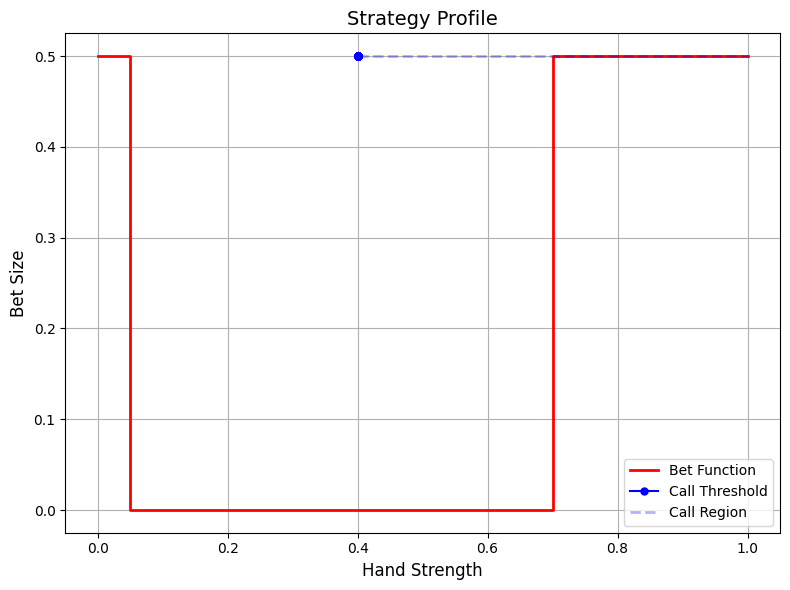

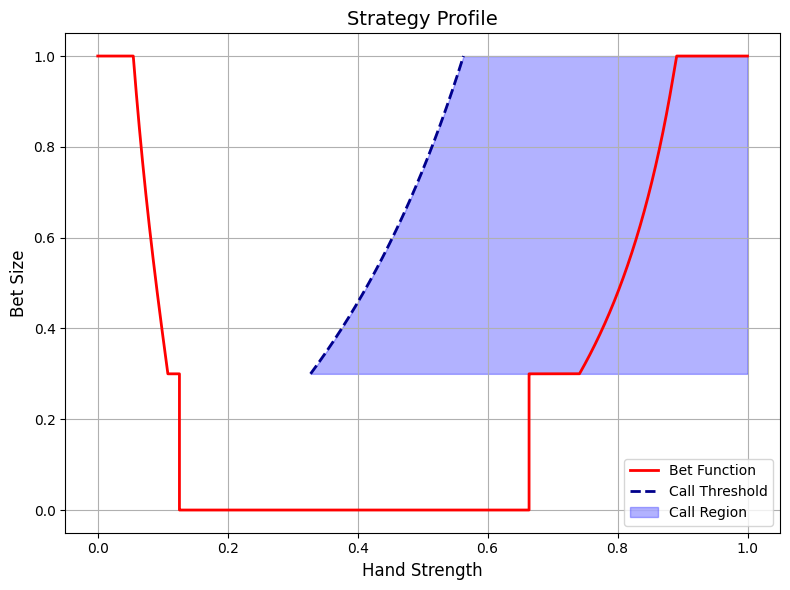

/var/folders/b1/z91xjqp97qb1ts5z67d5h7f00000gn/T/ipykernel_85611/3504013127.py:13: RuntimeWarning: divide by zero encountered in scalar divide
  return (1 / (7 * x)**(1/3)) - 1
/var/folders/b1/z91xjqp97qb1ts5z67d5h7f00000gn/T/ipykernel_85611/3504013127.py:16: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(3 / (7 * (1 - x))) - 1


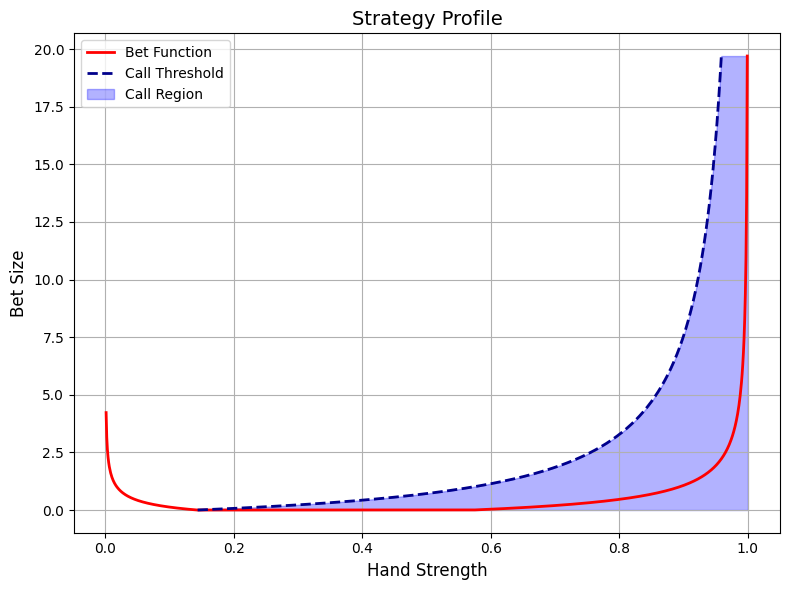

In [10]:
CP.generate_strategy_plot(game_params={'B': 0.5}, grid_size=21)
LCP.generate_strategy_plot(game_params={'L': 0.3, "U":1}, grid_size=10001)
NLCP.generate_strategy_plot({})
# LCP.value_size(game_params={'L': 0.5, "U":2}, x=0.65)
# LCP.inverse_v(x, x2)

In [28]:
from tqdm.notebook import tqdm

# EXPECTED PAYOFF OVER L, U GRID
cap = 10000
grid_size = 101
expected_payoff_grid_size = 101

# Create a grid of L and U values on a logarithmic scale
Ls = np.logspace(-np.log10(cap), np.log10(cap), grid_size)
Us = np.logspace(-np.log10(cap), np.log10(cap), grid_size)
# Ls = np.linspace(0, cap, grid_size)
# Us = np.linspace(0, cap, grid_size)
L_grid, U_grid = np.meshgrid(Ls, Us)

# Initialize an array to store expected payoffs
payoff_grid = np.full_like(L_grid, np.nan, dtype=np.float64)

# Compute expected payoff for each pair (L, U) where L < U
for i in tqdm(range(L_grid.shape[0]), desc="Rows"):
    for j in range(L_grid.shape[1]):
        L = L_grid[i, j]
        U = U_grid[i, j]
        if L <= U:
            params = {"L": L, "U": U}
            LCP_utils.clear_cache()
            avg_payoff = LCP.expected_payoff(params, grid_size=expected_payoff_grid_size)
            payoff_grid[i, j] = avg_payoff


Rows:   0%|          | 0/101 [00:00<?, ?it/s]

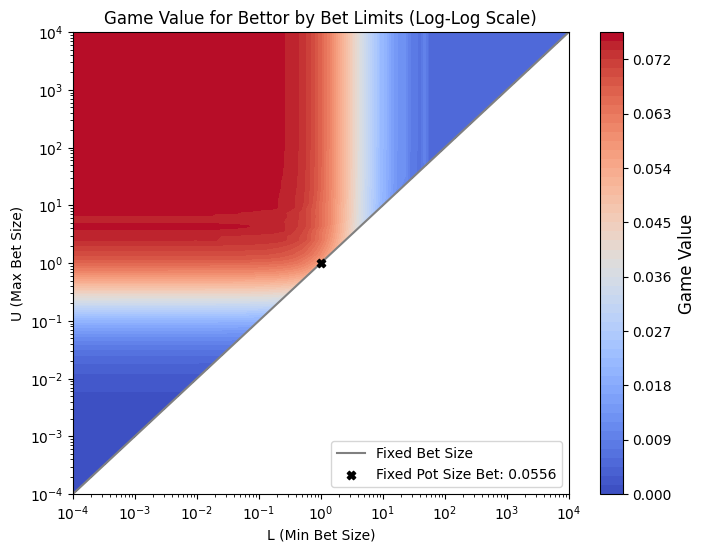

In [30]:
# Plot the heatmap on a log-log scale
plt.figure(figsize=(8, 6))
contour = plt.contourf(Ls, Us, payoff_grid, levels=50, cmap="coolwarm", vmax=np.nanmax(payoff_grid))

# Add a diagonal line from (0, 0) to (cap, cap)
plt.plot([1/cap, cap], [1/cap, cap], color="grey", linestyle="-", label="Fixed Bet Size")
# plt.plot([0, cap], [0, cap], color="grey", linestyle="-", label="Fixed Bet Size")

# Add a point at (1,1) labeled with the value there, ensuring it is on the line
value_at_point = payoff_grid[np.argmin(np.abs(Ls - 1)), np.argmin(np.abs(Us - 1))]
plt.scatter(1, 1, marker="X", color="black", label=f"Fixed Pot Size Bet: {value_at_point:.4f}", zorder=5)
plt.legend(loc="lower right")  # Move the legend to the bottom right

# Add a color bar with the same colormap
cbar = plt.colorbar(contour)
cbar.set_label("Game Value", fontsize=12)

plt.xscale("log")
plt.yscale("log")
plt.xlabel("L (Min Bet Size)")
plt.ylabel("U (Max Bet Size)")
plt.title("Game Value for Bettor by Bet Limits (Log-Log Scale)")
# plt.title("Game Value for Bettor by Bet Limits")
plt.show()


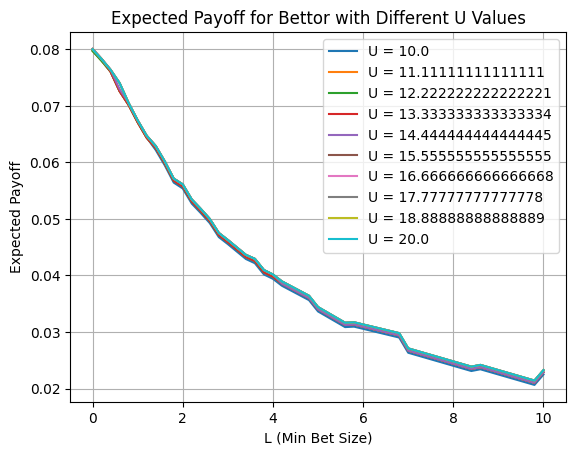

In [13]:
# Define the values of U to iterate over
U_values = np.linspace(10, 20, 10)
L = np.linspace(0, np.min(U_values), 51)

# Plot the expected payoff for each U
for U in U_values:
    payoff = np.empty_like(L)
    for i, l in enumerate(L):
        params = {"L": l, "U": U}
        LCP_utils.clear_cache()
        payoff[i] = LCP.expected_payoff(params, grid_size=51)
    plt.plot(L, payoff, label=f"U = {U}")

# Add labels, title, legend, and grid
plt.xlabel("L (Min Bet Size)")
plt.ylabel("Expected Payoff")
plt.title("Expected Payoff for Bettor with Different U Values")
plt.legend()
plt.grid()
plt.show()

/var/folders/b1/z91xjqp97qb1ts5z67d5h7f00000gn/T/ipykernel_30178/1454305013.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


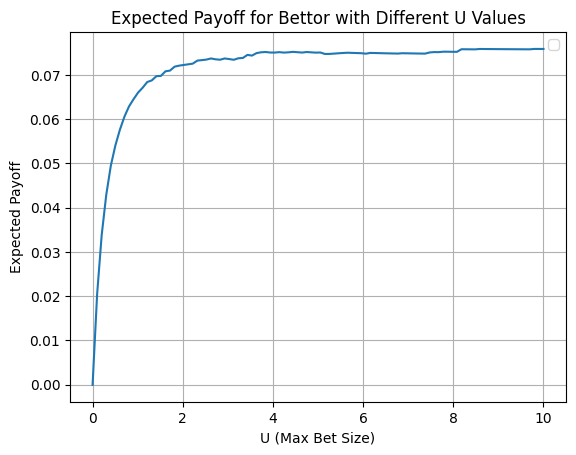

In [38]:

L = 0
# Us = np.logspace(-2, 2, 100)
Us = np.linspace(0, 10, 100)

# Plot the expected payoff for each U
payoffs = np.empty_like(Us)
for i, U in enumerate(Us):
    params = {"L": L, "U": U}
    LCP_utils.clear_cache()
    payoffs[i] = LCP.expected_payoff(params, grid_size=101)
plt.plot(Us, payoffs)

# Add labels, title, legend, and grid
# plt.xscale("log")
# plt.yscale("log")
plt.xlabel("U (Max Bet Size)")
plt.ylabel("Expected Payoff")
plt.title("Expected Payoff for Bettor with Different U Values")
plt.legend()
plt.grid()
plt.show()